In [1]:
import pandas as pd
import numpy as np
import os #Interacts with the operating system, e.g. paths, mkdir
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Allows ploting in a 3D graph

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report



In [2]:
file_path = './PowerPlantsintheU_Export_TableToExcel.xlsx'
df = pd.read_excel(file_path)

In [3]:
df.head().iloc[:,10:30]

,State,Zip,PrimSource,source_des,tech_desc,Install_MW,Total_MW,Bat_MW,Bio_MW,Coal_MW,Geo_MW,Hydro_MW,HydroPS_MW,NG_MW,Nuclear_MW,Crude_MW,Solar_MW,Wind_MW,Other_MW,Source
0,Wisconsin,54452,hydroelectric,Hydroelectric = 2.3 MW,Conventional Hydroelectric,2.3,2.3,0.0,0.0,0.0,0.0,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923"
1,Wisconsin,54143,hydroelectric,Hydroelectric = 1.3 MW,Conventional Hydroelectric,1.3,1.3,0.0,0.0,0.0,0.0,1.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923"
2,Wisconsin,54303,natural gas,Natural Gas = 79 MW,Natural Gas Fired Combustion Turbine,91.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,79.0,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923"
3,Wisconsin,54114,hydroelectric,Hydroelectric = 3.8 MW,Conventional Hydroelectric,3.8,3.8,0.0,0.0,0.0,0.0,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923"
4,Wisconsin,54487,hydroelectric,Hydroelectric = 2.6 MW,Conventional Hydroelectric,2.6,2.6,0.0,0.0,0.0,0.0,2.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923"


In [4]:
df.nunique()

OBJECTID_1    12008
OBJECTID      12008
Plant_Code    12008
Plant_Name    11985
Utility_ID     5123
Utility_Na     5109
sector_nam        7
Street_Add    11193
City           4871
County         1441
State            52
Zip            6637
PrimSource       12
source_des     3952
tech_desc       154
Install_MW     2163
Total_MW       2044
Bat_MW          114
Bio_MW          247
Coal_MW         220
Geo_MW           58
Hydro_MW        492
HydroPS_MW       41
NG_MW          1122
Nuclear_MW       55
Crude_MW        334
Solar_MW        393
Wind_MW         593
Other_MW         79
Source            1
Period            1
Longitude     11726
Latitude      11657
dtype: int64

In [41]:
df_outlier = df[df['Install_MW']>5000].copy() # save the outlier in a df
df.drop(df_outlier.index,inplace = True) # drop the outlier from the original df

In [44]:
# Calculate the total of production of energy by State
df_powerByState = df.groupby('State')[['Install_MW','Total_MW']].sum().reset_index()
# Rename columns 
df_powerByState.rename(columns={'Install_MW':'Install_MW_State','Total_MW':'Total_MW_State'},inplace=True)
# Merge the total with the df
df = pd.merge(df,df_powerByState, on = 'State')

In [45]:
# Select columns to analyze
Scolumns = ['sector_nam','PrimSource','Install_MW','Total_MW','Install_MW_State','Total_MW_State','Longitude','Latitude']
df[Scolumns]

,sector_nam,PrimSource,Install_MW,Total_MW,Install_MW_State,Total_MW_State,Longitude,Latitude
0,Electric Utility,hydroelectric,2.3,2.3,18146.5,16742.1,-89.685000,45.178600
1,Electric Utility,hydroelectric,1.3,1.3,18146.5,16742.1,-87.758600,45.113600
2,Electric Utility,natural gas,91.0,79.0,18146.5,16742.1,-88.008600,44.540000
3,Electric Utility,hydroelectric,3.8,3.8,18146.5,16742.1,-88.067800,45.233300
4,Electric Utility,hydroelectric,2.6,2.6,18146.5,16742.1,-89.730600,45.441100
...,...,...,...,...,...,...,...,...
12002,Commercial CHP,natural gas,6.0,6.0,6527.7,5981.0,-67.109007,18.485901
12003,Commercial Non-CHP,petroleum,3.8,2.4,6527.7,5981.0,-66.285500,18.260400
12004,Industrial Non-CHP,petroleum,27.6,27.6,6527.7,5981.0,-65.963100,18.373600
12005,Industrial Non-CHP,petroleum,8.2,8.2,6527.7,5981.0,-66.722048,18.470243


C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

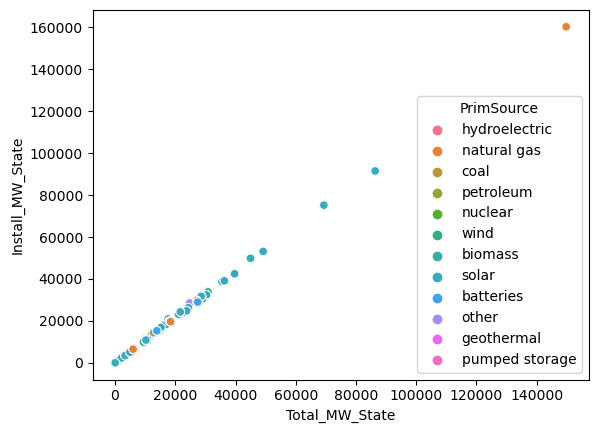

In [8]:
sns.scatterplot(data = df, x = df.Total_MW_State, y = df.Install_MW_State, hue = 'PrimSource')

plt.show()

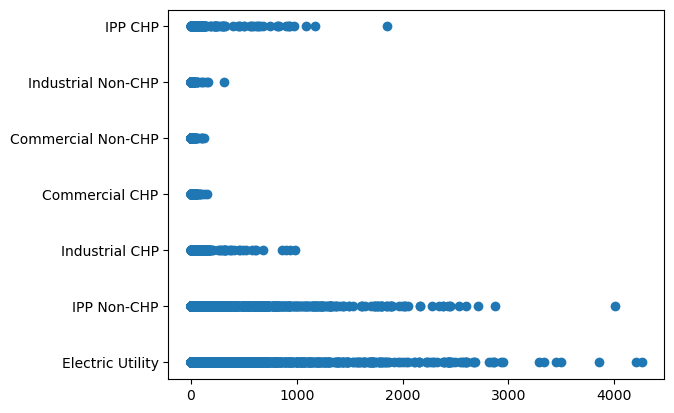

In [9]:


plt.scatter(df.Install_MW,df.sector_nam)

plt.show()

In [10]:
# sns.scatterplot(df, df.)

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

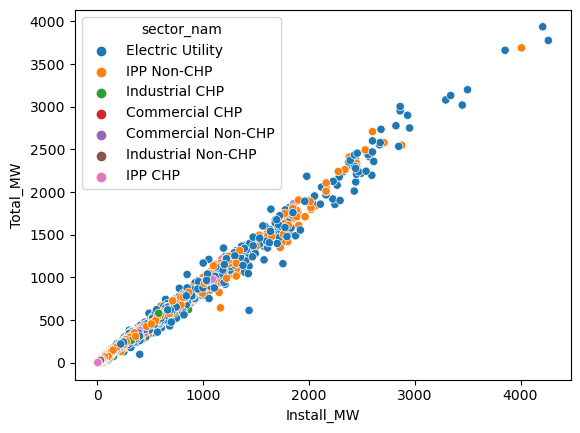

In [11]:

sns.scatterplot(data = df, x = df.Install_MW, y = df.Total_MW,hue='sector_nam')


# plt.xlabel('Birth Rate')
# plt.ylabel('Unemployment rate(%)')
# plt.title('Scatterplot of Birth Rate vs Unemployment rate(%)')


plt.show()

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

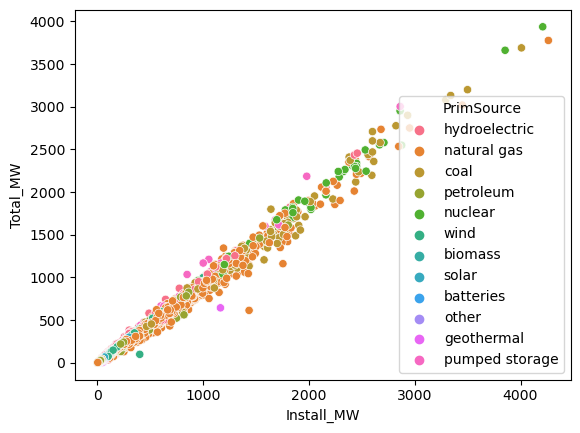

In [12]:

sns.scatterplot(data = df, x = df.Install_MW, y = df.Total_MW,hue='PrimSource')


# plt.xlabel('Birth Rate')
# plt.ylabel('Unemployment rate(%)')
# plt.title('Scatterplot of Birth Rate vs Unemployment rate(%)')


plt.show()

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='sector_nam', ylabel='Install_MW'>

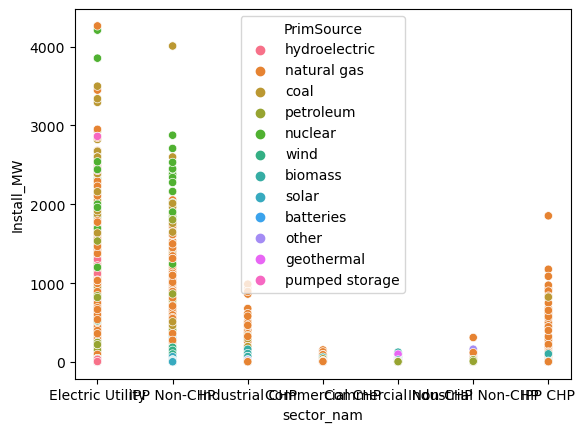

In [13]:
sns.scatterplot(data=df, x = df.sector_nam, y = df.Install_MW, hue = 'PrimSource')

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='PrimSource', ylabel='Total_MW'>

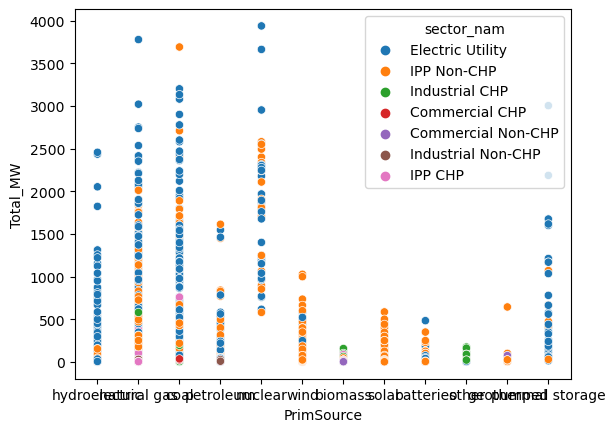

In [14]:
sns.scatterplot(data = df, x = df.PrimSource, y = df.Total_MW, hue = df.sector_nam)

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

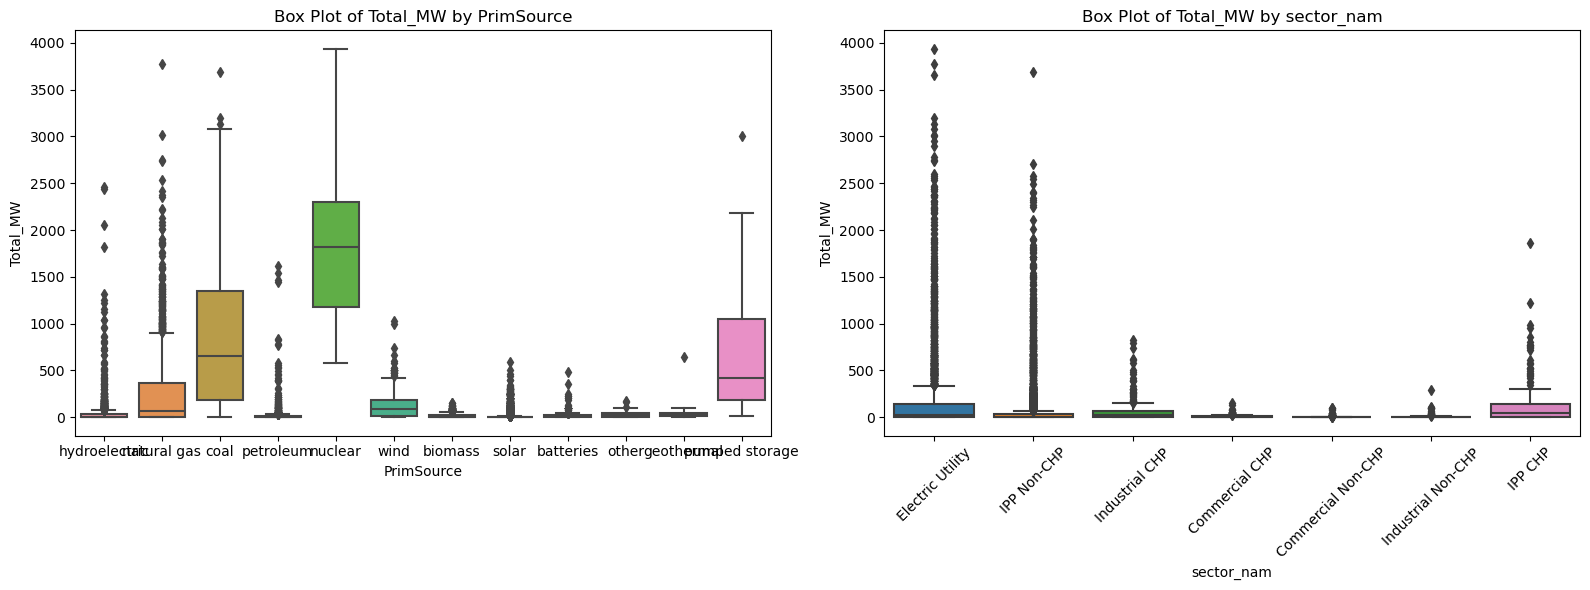

In [15]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot without 'sector_nam' as hue
sns.boxplot(data=df, x='PrimSource', y='Total_MW', ax=axes[0])
axes[0].set_title('Box Plot of Total_MW by PrimSource')
axes[0].set_xlabel('PrimSource')
axes[0].set_ylabel('Total_MW')

# Box plot with 'sector_nam' as x-axis
sns.boxplot(data=df, x='sector_nam', y='Total_MW', ax=axes[1])
axes[1].set_title('Box Plot of Total_MW by sector_nam')
axes[1].set_xlabel('sector_nam')
axes[1].set_ylabel('Total_MW')

# Rotate x-axis labels in the right subplot
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [46]:
df_KMeans = df[Scolumns].copy()

label_encoder = LabelEncoder()

df_KMeans['Sector_encoded'] = label_encoder.fit_transform(df_KMeans.sector_nam)
df_KMeans['PimSource_encoded'] = label_encoder.fit_transform(df_KMeans.PrimSource)

df_KMeans#.nunique()



,sector_nam,PrimSource,Install_MW,Total_MW,Install_MW_State,Total_MW_State,Longitude,Latitude,Sector_encoded,PimSource_encoded
0,Electric Utility,hydroelectric,2.3,2.3,18146.5,16742.1,-89.685000,45.178600,2,4
1,Electric Utility,hydroelectric,1.3,1.3,18146.5,16742.1,-87.758600,45.113600,2,4
2,Electric Utility,natural gas,91.0,79.0,18146.5,16742.1,-88.008600,44.540000,2,5
3,Electric Utility,hydroelectric,3.8,3.8,18146.5,16742.1,-88.067800,45.233300,2,4
4,Electric Utility,hydroelectric,2.6,2.6,18146.5,16742.1,-89.730600,45.441100,2,4
...,...,...,...,...,...,...,...,...,...,...
12002,Commercial CHP,natural gas,6.0,6.0,6527.7,5981.0,-67.109007,18.485901,0,5
12003,Commercial Non-CHP,petroleum,3.8,2.4,6527.7,5981.0,-66.285500,18.260400,1,8
12004,Industrial Non-CHP,petroleum,27.6,27.6,6527.7,5981.0,-65.963100,18.373600,6,8
12005,Industrial Non-CHP,petroleum,8.2,8.2,6527.7,5981.0,-66.722048,18.470243,6,8


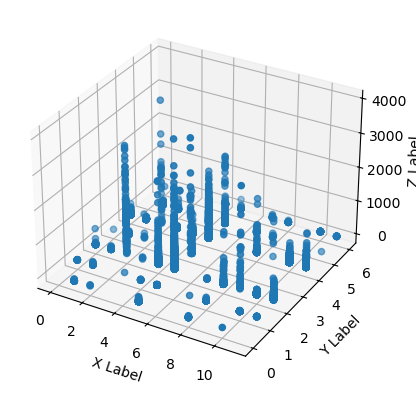

In [17]:
# Create a new figure with 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data in 3D
ax.scatter(df_KMeans.PimSource_encoded, df_KMeans.Sector_encoded, df.Total_MW)

# Set labels for the axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df_KMeans[['Install_MW','Total_MW','Total_MW_State','Sector_encoded','PimSource_encoded','Longitude','Latitude']])

df_KMeans[['SInstall_MW','STotal_MW','STotal_MW_State','SSector_encoded','SPimSource_encoded','SLongitude','SLatitude']] = scaler.transform(df_KMeans[['Install_MW','Total_MW','Total_MW_State','Sector_encoded','PimSource_encoded','Longitude','Latitude']])

df_KMeans.head()
# StandardScaler().fit_transform(df_KMeans[['Install_MW','Total_MW','Total_MW_State','Sector_encoded','PimSource_encoded']])

,sector_nam,PrimSource,Install_MW,Total_MW,Install_MW_State,Total_MW_State,Longitude,Latitude,Sector_encoded,PimSource_encoded,SInstall_MW,STotal_MW,STotal_MW_State,SSector_encoded,SPimSource_encoded,SLongitude,SLatitude
0,Electric Utility,hydroelectric,2.3,2.3,18146.5,16742.1,-89.6850,45.1786,2,4,0.000469,0.000584,0.111472,0.333333,0.363636,0.770696,0.510480
1,Electric Utility,hydroelectric,1.3,1.3,18146.5,16742.1,-87.7586,45.1136,2,4,0.000235,0.000330,0.111472,0.333333,0.363636,0.788796,0.509261
2,Electric Utility,natural gas,91.0,79.0,18146.5,16742.1,-88.0086,44.5400,2,5,0.021278,0.020066,0.111472,0.333333,0.454545,0.786447,0.498509
3,Electric Utility,hydroelectric,3.8,3.8,18146.5,16742.1,-88.0678,45.2333,2,4,0.000821,0.000965,0.111472,0.333333,0.363636,0.785891,0.511505
4,Electric Utility,hydroelectric,2.6,2.6,18146.5,16742.1,-89.7306,45.4411,2,4,0.000540,0.000660,0.111472,0.333333,0.363636,0.770268,0.515401


In [50]:

# df_KMeans[['SInstall_MW','STotal_MW','STotal_MW_State','SSector_encoded','SPimSource_encoded','SLongitude','SLatitude']] = StandardScaler().fit_transform(df_KMeans[['Install_MW','Total_MW','Total_MW_State','Sector_encoded','PimSource_encoded','Longitude','Latitude']])
# df_KMeans
encoded_columns = ['SInstall_MW','STotal_MW','STotal_MW_State','SSector_encoded','SPimSource_encoded','SLongitude','SLatitude']
df_KMeans[encoded_columns]

,SInstall_MW,STotal_MW,STotal_MW_State,SSector_encoded,SPimSource_encoded,SLongitude,SLatitude
0,0.000469,0.000584,0.111472,0.333333,0.363636,0.770696,0.510480
1,0.000235,0.000330,0.111472,0.333333,0.363636,0.788796,0.509261
2,0.021278,0.020066,0.111472,0.333333,0.454545,0.786447,0.498509
3,0.000821,0.000965,0.111472,0.333333,0.363636,0.785891,0.511505
4,0.000540,0.000660,0.111472,0.333333,0.363636,0.770268,0.515401
...,...,...,...,...,...,...,...
12002,0.001337,0.001524,0.039603,0.000000,0.454545,0.982811,0.010100
12003,0.000821,0.000610,0.039603,0.166667,0.727273,0.990549,0.005873
12004,0.006404,0.007010,0.039603,1.000000,0.727273,0.993578,0.007995
12005,0.001853,0.002083,0.039603,1.000000,0.727273,0.986447,0.009807


In [49]:
df_KMeans.iloc[:,8:]
# km.fit_predict(df_KMeans.iloc[:,2:].values)


,Sector_encoded,PimSource_encoded,SInstall_MW,STotal_MW,STotal_MW_State,SSector_encoded,SPimSource_encoded,SLongitude,SLatitude
0,2,4,0.000469,0.000584,0.111472,0.333333,0.363636,0.770696,0.510480
1,2,4,0.000235,0.000330,0.111472,0.333333,0.363636,0.788796,0.509261
2,2,5,0.021278,0.020066,0.111472,0.333333,0.454545,0.786447,0.498509
3,2,4,0.000821,0.000965,0.111472,0.333333,0.363636,0.785891,0.511505
4,2,4,0.000540,0.000660,0.111472,0.333333,0.363636,0.770268,0.515401
...,...,...,...,...,...,...,...,...,...
12002,0,5,0.001337,0.001524,0.039603,0.000000,0.454545,0.982811,0.010100
12003,1,8,0.000821,0.000610,0.039603,0.166667,0.727273,0.990549,0.005873
12004,6,8,0.006404,0.007010,0.039603,1.000000,0.727273,0.993578,0.007995
12005,6,8,0.001853,0.002083,0.039603,1.000000,0.727273,0.986447,0.009807


In [51]:
km = KMeans(n_clusters=3, random_state=42)
y_predicted = km.fit_predict(df_KMeans[encoded_columns])
df_KMeans['Cluster'] = y_predicted

C:\Users\crist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [52]:
df_KMeans

,sector_nam,PrimSource,Install_MW,Total_MW,Install_MW_State,Total_MW_State,Longitude,Latitude,Sector_encoded,PimSource_encoded,SInstall_MW,STotal_MW,STotal_MW_State,SSector_encoded,SPimSource_encoded,SLongitude,SLatitude,Cluster
0,Electric Utility,hydroelectric,2.3,2.3,18146.5,16742.1,-89.685000,45.178600,2,4,0.000469,0.000584,0.111472,0.333333,0.363636,0.770696,0.510480,2
1,Electric Utility,hydroelectric,1.3,1.3,18146.5,16742.1,-87.758600,45.113600,2,4,0.000235,0.000330,0.111472,0.333333,0.363636,0.788796,0.509261,2
2,Electric Utility,natural gas,91.0,79.0,18146.5,16742.1,-88.008600,44.540000,2,5,0.021278,0.020066,0.111472,0.333333,0.454545,0.786447,0.498509,2
3,Electric Utility,hydroelectric,3.8,3.8,18146.5,16742.1,-88.067800,45.233300,2,4,0.000821,0.000965,0.111472,0.333333,0.363636,0.785891,0.511505,2
4,Electric Utility,hydroelectric,2.6,2.6,18146.5,16742.1,-89.730600,45.441100,2,4,0.000540,0.000660,0.111472,0.333333,0.363636,0.770268,0.515401,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,Commercial CHP,natural gas,6.0,6.0,6527.7,5981.0,-67.109007,18.485901,0,5,0.001337,0.001524,0.039603,0.000000,0.454545,0.982811,0.010100,2
12003,Commercial Non-CHP,petroleum,3.8,2.4,6527.7,5981.0,-66.285500,18.260400,1,8,0.000821,0.000610,0.039603,0.166667,0.727273,0.990549,0.005873,1
12004,Industrial Non-CHP,petroleum,27.6,27.6,6527.7,5981.0,-65.963100,18.373600,6,8,0.006404,0.007010,0.039603,1.000000,0.727273,0.993578,0.007995,1
12005,Industrial Non-CHP,petroleum,8.2,8.2,6527.7,5981.0,-66.722048,18.470243,6,8,0.001853,0.002083,0.039603,1.000000,0.727273,0.986447,0.009807,1


C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Total_MW', ylabel='Install_MW'>

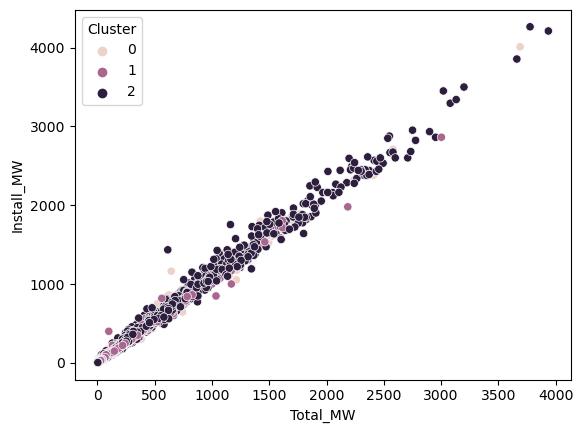

In [53]:

sns.scatterplot(data = df_KMeans, x=df_KMeans.Total_MW, y=df_KMeans.Install_MW, hue = 'Cluster')

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='Total_MW', ylabel='Install_MW'>

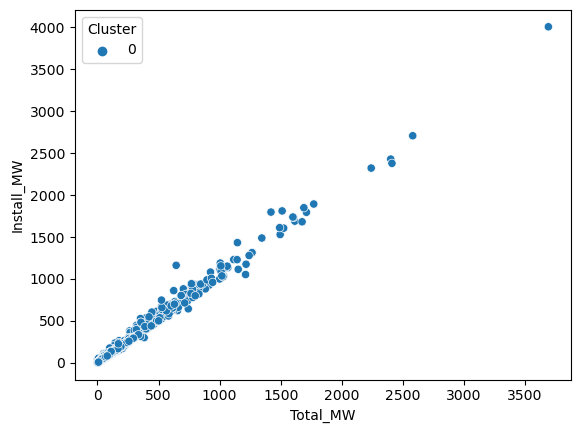

In [95]:
# df0 = df_KMeans[df_KMeans['Cluster']==0]
# sns.scatterplot(data = df1, x=df1.Total_MW, y=df1.Install_MW, hue = 'Cluster')

In [55]:
df_KMeans.iloc[:,8:13]

,Sector_encoded,PimSource_encoded,SInstall_MW,STotal_MW,STotal_MW_State
0,2,4,0.000469,0.000584,0.111472
1,2,4,0.000235,0.000330,0.111472
2,2,5,0.021278,0.020066,0.111472
3,2,4,0.000821,0.000965,0.111472
4,2,4,0.000540,0.000660,0.111472
...,...,...,...,...,...
12002,0,5,0.001337,0.001524,0.039603
12003,1,8,0.000821,0.000610,0.039603
12004,6,8,0.006404,0.007010,0.039603
12005,6,8,0.001853,0.002083,0.039603


In [56]:
wcss = []

for k in range(1,11):
    km = KMeans(n_clusters=k)
    km.fit(df_KMeans[encoded_columns])
    wcss.append(km.inertia_)
    


C:\Users\crist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\crist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\crist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\crist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

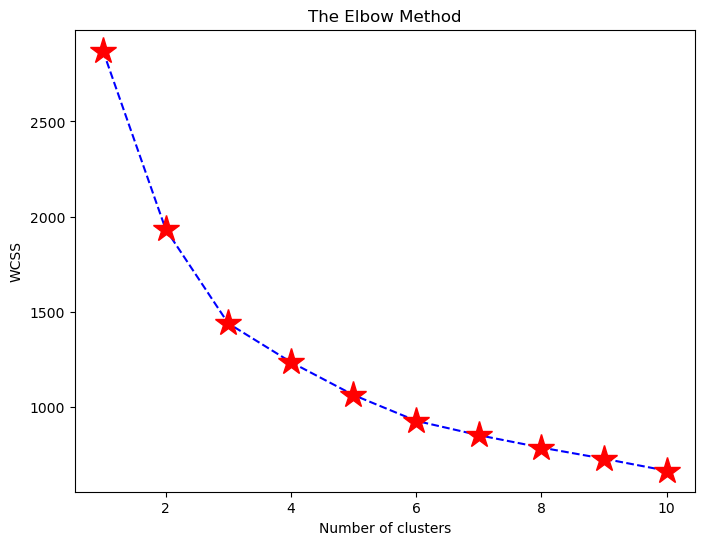

In [57]:
fx, ax = plt.subplots(figsize = (8,6))

plt.plot(range(1,11), wcss, marker = '*', linestyle = '--', color='b', markerfacecolor = 'r', mec = 'r', ms = 20)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('ElbowMethod.png')
plt.show()



In [27]:
df.columns

Index(['OBJECTID_1', 'OBJECTID', 'Plant_Code', 'Plant_Name', 'Utility_ID',
       'Utility_Na', 'sector_nam', 'Street_Add', 'City', 'County', 'State',
       'Zip', 'PrimSource', 'source_des', 'tech_desc', 'Install_MW',
       'Total_MW', 'Bat_MW', 'Bio_MW', 'Coal_MW', 'Geo_MW', 'Hydro_MW',
       'HydroPS_MW', 'NG_MW', 'Nuclear_MW', 'Crude_MW', 'Solar_MW', 'Wind_MW',
       'Other_MW', 'Source', 'Period', 'Longitude', 'Latitude',
       'Install_MW_State', 'Total_MW_State'],
      dtype='object')

In [58]:
def ByState(df,column):
    return df.groupby(['State','PrimSource'])[column].sum().reset_index()
ByState(df,'Total_MW')

,State,PrimSource,Total_MW
0,Alabama,biomass,647.2
1,Alabama,coal,2777.5
2,Alabama,hydroelectric,3291.8
3,Alabama,natural gas,16256.7
4,Alabama,nuclear,5452.7
...,...,...,...
436,Wyoming,natural gas,315.2
437,Wyoming,other,15.9
438,Wyoming,petroleum,4.7
439,Wyoming,solar,92.0


In [59]:
def Top10States(df,column):
    df_StateStatistics = df.groupby('State')[column].sum().sort_values(ascending=False)
    return df_StateStatistics.reset_index().iloc[:10,:1]
Top10States(ByState(df,'Total_MW'),'Total_MW')

,State
0,Texas
1,California
2,Florida
3,Pennsylvania
4,Illinois
5,New York
6,Georgia
7,North Carolina
8,Oklahoma
9,Michigan


In [113]:
def get_top3 (year_top,df):
    def top (df,column = year_top):
        return df.sort_values(by=year_top,ascending=False)[:3]
    return df.groupby('State').apply(top).reset_index(drop=True)#[['OdName','AREA','AreaName','REG','RegName','DEV','DevName',year_top]]

get_top3('Total_MW',ByState(df,'Total_MW'))



,State,PrimSource,Total_MW
0,Alabama,natural gas,16256.7
1,Alabama,nuclear,5452.7
2,Alabama,hydroelectric,3291.8
3,Alaska,natural gas,1321.1
4,Alaska,petroleum,732.2
...,...,...,...
151,Wisconsin,coal,5334.5
152,Wisconsin,nuclear,1211.0
153,Wyoming,coal,6350.0
154,Wyoming,wind,3006.9


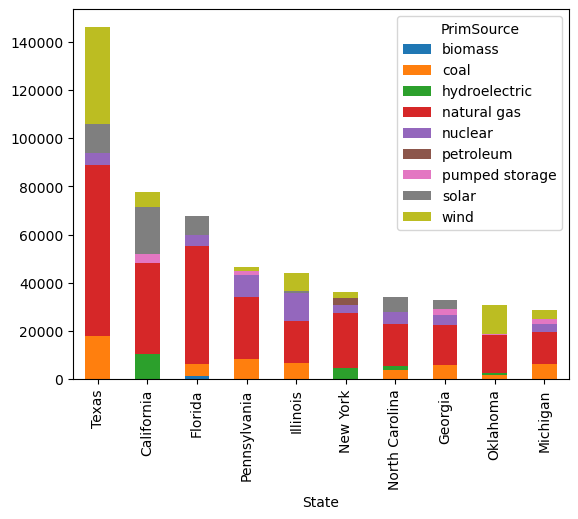

In [87]:
def VisTop10(df,column):
    df_VisTop10 = df[df['State'].isin(set(Top10States(df,column)['State']))]
    df_VisTop10 = df_VisTop10.groupby(['PrimSource','State'])[column].sum().unstack().T
    df_VisTop10.fillna(0,inplace=True)
    df_VisTop10['Total'] = df_VisTop10.sum(axis=1)
    return df_VisTop10.sort_values(by='Total').iloc[:,:-1][::-1]
    
def PlotVisTop10(df,column):
    VisTop10(get_top3(column,ByState(df,column)),column).plot(kind='bar', stacked = True)
    return plt.show()

PlotVisTop10(df,'Total_MW')

In [92]:
VisTop10(df,'Total_MW')

PrimSource,batteries,biomass,coal,geothermal,hydroelectric,natural gas,nuclear,other,petroleum,pumped storage,solar,wind
State,,,,,,,,,,,,
Texas,1698.6,364.1,17827.6,0.0,715.2,70901.4,4980.0,121.6,628.4,0.0,12255.8,40290.5
California,2943.2,1117.6,57.0,1866.8,10481.4,37891.6,2240.0,251.7,341.7,3658.8,19338.5,6175.4
Florida,523.8,1150.3,4898.4,0.0,43.5,49053.0,4920.1,312.9,951.1,0.0,7486.1,0.0
Pennsylvania,28.4,390.6,8094.5,0.0,899.6,26136.4,9093.2,105.9,1202.5,1544.4,217.2,1460.0
Illinois,75.8,55.8,6735.1,0.0,22.9,17282.0,11582.4,114.5,679.1,0.0,925.7,7511.8
New York,88.2,455.3,0.0,0.0,4562.9,22680.1,3341.3,20.0,3136.1,1408.8,1469.7,2527.5
Georgia,0.0,1157.5,5780.0,0.0,1295.4,16533.7,4061.0,0.0,1070.0,2587.0,3810.1,0.0
North Carolina,70.2,389.9,3564.0,0.0,1894.0,17253.8,5149.6,54.0,529.3,173.7,6224.0,208.0
Oklahoma,10.0,76.2,1789.0,0.0,843.7,15657.9,0.0,0.0,39.5,258.0,45.0,12145.7


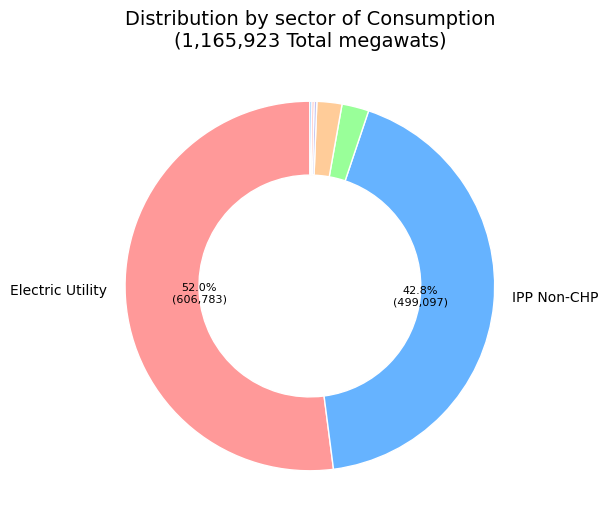

In [66]:
df_SectorNameStatistics = df.groupby('sector_nam')['Total_MW'].sum().sort_values(ascending=False)


custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Create a figure with a subplot for the pie chart
fig, ax = plt.subplots(figsize=(10, 6))

# Define a function to customize label display
def pie_label_func(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    if pct >= 4.2:  # Display label only if the percentage is greater than or equal to 3%
        return f'{pct:.1f}%\n({absolute:,})'
    else:
        return ''

# Plot the pie chart with adjusted autopct label placement
wedges, texts, autotexts = ax.pie(
    df_SectorNameStatistics,
    labels=[f'{label}\n' if pct >= 3 else '' for label, pct in zip(df_SectorNameStatistics.index, df_SectorNameStatistics / df_SectorNameStatistics.sum() * 100)],
    autopct=lambda pct: pie_label_func(pct, df_SectorNameStatistics),
    startangle=90,
    colors=custom_colors,
    wedgeprops=dict(width=0.4),
    textprops=dict(color="black"),
    labeldistance=1.1,  # Adjust label distance from the center to avoid overlapping
)

# Customize the appearance of the wedges and text
for wedge, text, autotext in zip(wedges, texts, autotexts):
    wedge.set_edgecolor('white')  # White edges for better visibility
    text.set_fontsize(10)        # Adjust text font size
    autotext.set_fontsize(8)     # Adjust autopct text font size

# Add a title
plt.title(f'Distribution by sector of Consumption\n({format(int(df_SectorNameStatistics.sum()), ",")} Total megawats)', fontsize=14)

# Save the pie chart as an image
# plt.savefig('DomPieChart_DistOPTRByDIV.png', bbox_inches='tight')

# Show the plot
plt.show()


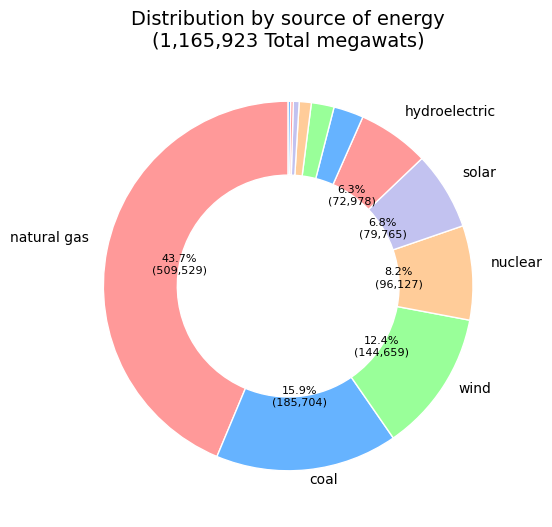

In [67]:
def df_statistics(df):
    return df.groupby('PrimSource')['Total_MW'].sum().sort_values(ascending=False)

df_PrimSourceStatistics = df_statistics(df)

custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']


# Define a function to customize label display
def pie_label_func(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    if pct >= 4.2:  # Display label only if the percentage is greater than or equal to 3%
        return f'{pct:.1f}%\n({absolute:,})'
    else:
        return ''

def PlotStatistics(df):
    # Create a figure with a subplot for the pie chart
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the pie chart with adjusted autopct label placement
    wedges, texts, autotexts = ax.pie(
        df,
        labels=[f'{label}\n' if pct >= 3 else '' for label, pct in zip(df.index, df / df.sum() * 100)],
        autopct=lambda pct: pie_label_func(pct, df),
        startangle=90,
        colors=custom_colors,
        wedgeprops=dict(width=0.4),
        textprops=dict(color="black"),
        labeldistance=1.1,  # Adjust label distance from the center to avoid overlapping
    )

    # Customize the appearance of the wedges and text
    for wedge, text, autotext in zip(wedges, texts, autotexts):
        wedge.set_edgecolor('white')  # White edges for better visibility
        text.set_fontsize(10)        # Adjust text font size
        autotext.set_fontsize(8)     # Adjust autopct text font size

    # Add a title
    plt.title(f'Distribution by source of energy\n({format(int(df_PrimSourceStatistics.sum()), ",")} Total megawats)', fontsize=14)

# Save the pie chart as an image
# plt.savefig('DomPieChart_DistOPTRByDIV.png', bbox_inches='tight')

# Show the plot
    return plt.show()
PlotStatistics(df_statistics(df))

# Visualization KMeans

In [68]:
df_KMeans['State'] = df['State']
# df_KMeans[['Longitude', 'Latitude']] = df[['Longitude', 'Latitude']]
df_KMeans.head()

,sector_nam,PrimSource,Install_MW,Total_MW,Install_MW_State,Total_MW_State,Longitude,Latitude,Sector_encoded,PimSource_encoded,SInstall_MW,STotal_MW,STotal_MW_State,SSector_encoded,SPimSource_encoded,SLongitude,SLatitude,Cluster,State
0,Electric Utility,hydroelectric,2.3,2.3,18146.5,16742.1,-89.6850,45.1786,2,4,0.000469,0.000584,0.111472,0.333333,0.363636,0.770696,0.510480,2,Wisconsin
1,Electric Utility,hydroelectric,1.3,1.3,18146.5,16742.1,-87.7586,45.1136,2,4,0.000235,0.000330,0.111472,0.333333,0.363636,0.788796,0.509261,2,Wisconsin
2,Electric Utility,natural gas,91.0,79.0,18146.5,16742.1,-88.0086,44.5400,2,5,0.021278,0.020066,0.111472,0.333333,0.454545,0.786447,0.498509,2,Wisconsin
3,Electric Utility,hydroelectric,3.8,3.8,18146.5,16742.1,-88.0678,45.2333,2,4,0.000821,0.000965,0.111472,0.333333,0.363636,0.785891,0.511505,2,Wisconsin
4,Electric Utility,hydroelectric,2.6,2.6,18146.5,16742.1,-89.7306,45.4411,2,4,0.000540,0.000660,0.111472,0.333333,0.363636,0.770268,0.515401,2,Wisconsin


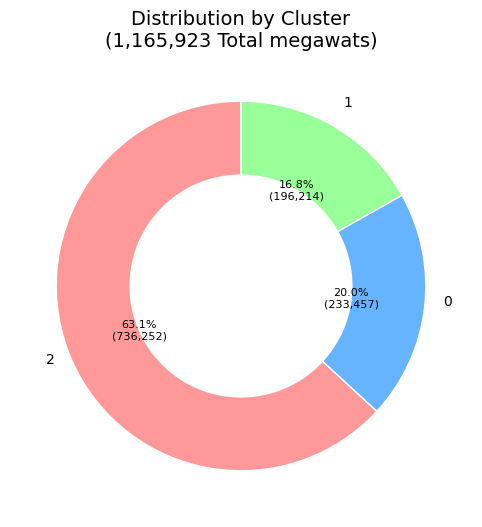

In [69]:


df_ByCluster = df_KMeans.groupby('Cluster')['Total_MW'].sum().sort_values(ascending=False)


custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Create a figure with a subplot for the pie chart
fig, ax = plt.subplots(figsize=(10, 6))

# Define a function to customize label display
def pie_label_func(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    if pct >= 4.2:  # Display label only if the percentage is greater than or equal to 3%
        return f'{pct:.1f}%\n({absolute:,})'
    else:
        return ''

# Plot the pie chart with adjusted autopct label placement
wedges, texts, autotexts = ax.pie(
    df_ByCluster,
    labels=[f'{label}\n' if pct >= 3 else '' for label, pct in zip(df_ByCluster.index, df_ByCluster / df_ByCluster.sum() * 100)],
    autopct=lambda pct: pie_label_func(pct, df_ByCluster),
    startangle=90,
    colors=custom_colors,
    wedgeprops=dict(width=0.4),
    textprops=dict(color="black"),
    labeldistance=1.1,  # Adjust label distance from the center to avoid overlapping
)

# Customize the appearance of the wedges and text
for wedge, text, autotext in zip(wedges, texts, autotexts):
    wedge.set_edgecolor('white')  # White edges for better visibility
    text.set_fontsize(10)        # Adjust text font size
    autotext.set_fontsize(8)     # Adjust autopct text font size

# Add a title
plt.title(f'Distribution by Cluster\n({format(int(df_ByCluster.sum()), ",")} Total megawats)', fontsize=14)

# Save the pie chart as an image
# plt.savefig('DomPieChart_DistOPTRByDIV.png', bbox_inches='tight')

# Show the plot
plt.show()


In [105]:
df0 = df_KMeans[df_KMeans['Cluster']==0]
df1 = df_KMeans[df_KMeans['Cluster']==1]
df2 = df_KMeans[df_KMeans['Cluster']==2]

In [71]:
df1#.groupby('State')['Total_MW'].sum().sort_values(ascending=False)

,sector_nam,PrimSource,Install_MW,Total_MW,Install_MW_State,Total_MW_State,Longitude,Latitude,Sector_encoded,PimSource_encoded,SInstall_MW,STotal_MW,STotal_MW_State,SSector_encoded,SPimSource_encoded,SLongitude,SLatitude,Cluster,State
10,Electric Utility,petroleum,16.9,16.9,18146.5,16742.1,-91.503400,44.252400,2,8,0.003894,0.004293,0.111472,0.333333,0.727273,0.753611,0.493117,1,Wisconsin
11,Electric Utility,petroleum,8.6,8.4,18146.5,16742.1,-91.840382,45.401930,2,8,0.001947,0.002134,0.111472,0.333333,0.727273,0.750445,0.514666,1,Wisconsin
12,Electric Utility,petroleum,3.5,3.5,18146.5,16742.1,-90.780325,43.742874,2,8,0.000751,0.000889,0.111472,0.333333,0.727273,0.760405,0.483566,1,Wisconsin
14,Electric Utility,petroleum,6.6,6.6,18146.5,16742.1,-90.267500,43.739500,2,8,0.001478,0.001676,0.111472,0.333333,0.727273,0.765223,0.483502,1,Wisconsin
15,Electric Utility,petroleum,7.4,7.4,18146.5,16742.1,-90.655800,42.982800,2,8,0.001666,0.001880,0.111472,0.333333,0.727273,0.761575,0.469317,1,Wisconsin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12000,Industrial Non-CHP,petroleum,5.7,5.4,6527.7,5981.0,-66.143532,18.454087,6,8,0.001267,0.001372,0.039603,1.000000,0.727273,0.991882,0.009504,1,Puerto Rico
12001,Commercial Non-CHP,petroleum,4.4,4.0,6527.7,5981.0,-67.153145,18.179255,1,8,0.000962,0.001016,0.039603,0.166667,0.727273,0.982397,0.004352,1,Puerto Rico
12003,Commercial Non-CHP,petroleum,3.8,2.4,6527.7,5981.0,-66.285500,18.260400,1,8,0.000821,0.000610,0.039603,0.166667,0.727273,0.990549,0.005873,1,Puerto Rico
12004,Industrial Non-CHP,petroleum,27.6,27.6,6527.7,5981.0,-65.963100,18.373600,6,8,0.006404,0.007010,0.039603,1.000000,0.727273,0.993578,0.007995,1,Puerto Rico


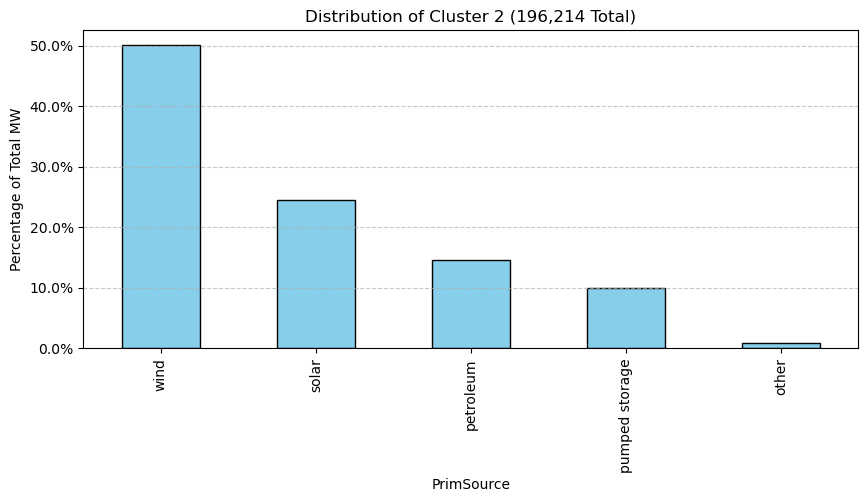

In [77]:
# Calculate percentage
df_StatisticsByCluster = df1.groupby('PrimSource')['Total_MW'].sum().sort_values(ascending=False)

df_StateStatistics_percent = df_StatisticsByCluster / df_StatisticsByCluster.sum() * 100
total_sum_per = df_StateStatistics_percent.sum()
plt.figure(figsize=(10, 6))

# Create the bar plot
ax = df_StateStatistics_percent.plot(kind='bar', color='skyblue', edgecolor='black')

# Format y-axis labels to show percentage
ax.yaxis.set_major_formatter('{x:.1f}%')

# Add percentages to each bar
# for i, value in enumerate(df_StatisticsByCluster):
#     ax.text(i, value + 0.1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10, rotation=90)

plt.title(f'Distribution of Cluster 2 ({df_StatisticsByCluster.sum():,.0f} Total)')
plt.xlabel('PrimSource')
plt.ylabel('Percentage of Total MW')

# Rotate x-axis labels by 90 degrees
# plt.xticks(rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.subplots_adjust(bottom=0.35)
plt.savefig("DistCLuster2.png")

plt.show()

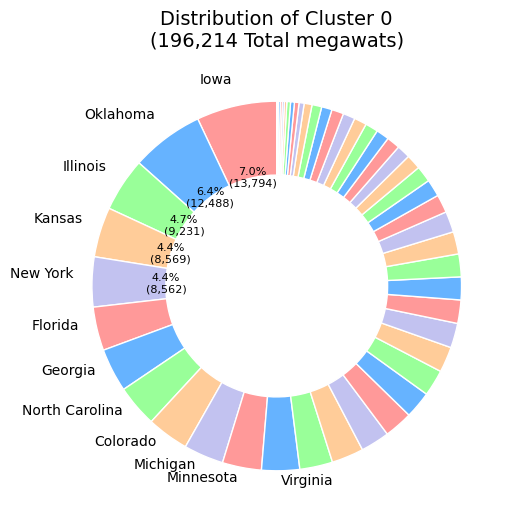

In [78]:


df1_ByState = df1.groupby('State')['Total_MW'].sum().sort_values(ascending=False)


custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Create a figure with a subplot for the pie chart
fig, ax = plt.subplots(figsize=(10, 6))

# Define a function to customize label display
def pie_label_func(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    if pct >= 4.2:  # Display label only if the percentage is greater than or equal to 3%
        return f'{pct:.1f}%\n({absolute:,})'
    else:
        return ''

# Plot the pie chart with adjusted autopct label placement
wedges, texts, autotexts = ax.pie(
    df1_ByState,
    labels=[f'{label}\n' if pct >= 3 else '' for label, pct in zip(df1_ByState.index, df1_ByState / df1_ByState.sum() * 100)],
    autopct=lambda pct: pie_label_func(pct, df1_ByState),
    startangle=90,
    colors=custom_colors,
    wedgeprops=dict(width=0.4),
    textprops=dict(color="black"),
    labeldistance=1.1,  # Adjust label distance from the center to avoid overlapping
)

# Customize the appearance of the wedges and text
for wedge, text, autotext in zip(wedges, texts, autotexts):
    wedge.set_edgecolor('white')  # White edges for better visibility
    text.set_fontsize(10)        # Adjust text font size
    autotext.set_fontsize(8)     # Adjust autopct text font size

# Add a title
plt.title(f'Distribution of Cluster 0\n({format(int(df1_ByState.sum()), ",")} Total megawats)', fontsize=14)

# Save the pie chart as an image
# plt.savefig('DomPieChart_DistOPTRByDIV.png', bbox_inches='tight')

# Show the plot
plt.show()

In [79]:
# Calculate percentage

df_StateStatistics_percent = df_StateStatistics / total_sum * 100
total_sum_per = df_StateStatistics_percent.sum()
plt.figure(figsize=(10, 6))

# Create the bar plot
ax = df_StateStatistics_percent.plot(kind='bar', color='skyblue', edgecolor='black')

# Format y-axis labels to show percentage
ax.yaxis.set_major_formatter('{x:.1f}%')

# Add percentages to each bar
for i, value in enumerate(df_StateStatistics_percent):
    ax.text(i, value + 0.1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10, rotation=90)

plt.title(f'Percentage of QTY JBS by Label ({total_sum_per:,.0f} Total)')
plt.xlabel('StoreName')
plt.ylabel('Percentage of Total QTY')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

NameError: name 'total_sum' is not defined

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


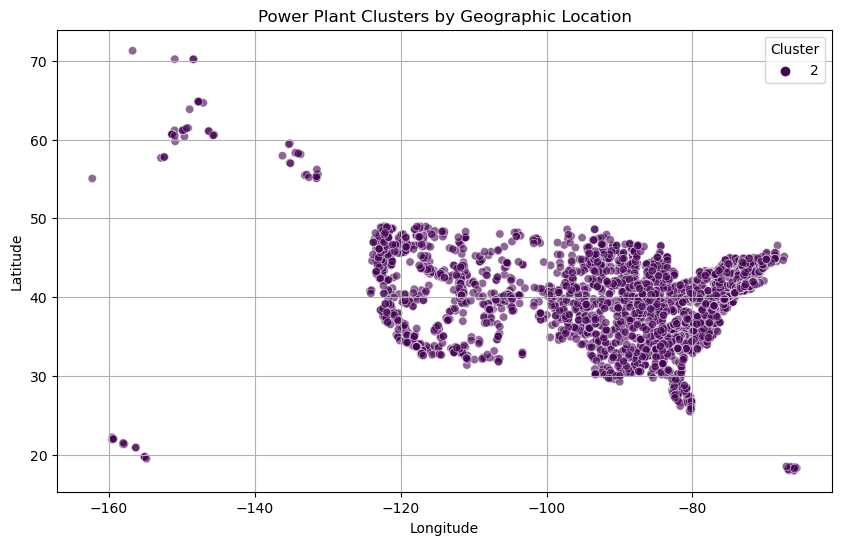

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


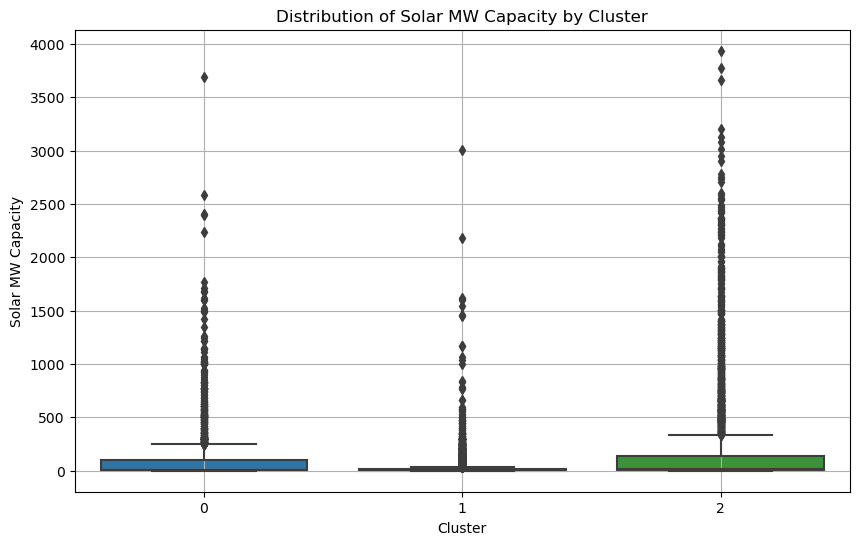

In [111]:
# Visualizing the clusters based on two dimensions: Longitude and Latitude to see geographical patterns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='Longitude', y='Latitude', hue='Cluster', palette='viridis', alpha=0.6)
plt.title('Power Plant Clusters by Geographic Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Additionally, visualize the distribution of a few key features (e.g., Solar_MW, Nuclear_MW) across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Total_MW', data=df_KMeans)
plt.title('Distribution of Solar MW Capacity by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Solar MW Capacity')
plt.grid(True)
plt.show()

In [81]:
df1

,sector_nam,PrimSource,Install_MW,Total_MW,Install_MW_State,Total_MW_State,Longitude,Latitude,Sector_encoded,PimSource_encoded,SInstall_MW,STotal_MW,STotal_MW_State,SSector_encoded,SPimSource_encoded,SLongitude,SLatitude,Cluster,State
10,Electric Utility,petroleum,16.9,16.9,18146.5,16742.1,-91.503400,44.252400,2,8,0.003894,0.004293,0.111472,0.333333,0.727273,0.753611,0.493117,1,Wisconsin
11,Electric Utility,petroleum,8.6,8.4,18146.5,16742.1,-91.840382,45.401930,2,8,0.001947,0.002134,0.111472,0.333333,0.727273,0.750445,0.514666,1,Wisconsin
12,Electric Utility,petroleum,3.5,3.5,18146.5,16742.1,-90.780325,43.742874,2,8,0.000751,0.000889,0.111472,0.333333,0.727273,0.760405,0.483566,1,Wisconsin
14,Electric Utility,petroleum,6.6,6.6,18146.5,16742.1,-90.267500,43.739500,2,8,0.001478,0.001676,0.111472,0.333333,0.727273,0.765223,0.483502,1,Wisconsin
15,Electric Utility,petroleum,7.4,7.4,18146.5,16742.1,-90.655800,42.982800,2,8,0.001666,0.001880,0.111472,0.333333,0.727273,0.761575,0.469317,1,Wisconsin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12000,Industrial Non-CHP,petroleum,5.7,5.4,6527.7,5981.0,-66.143532,18.454087,6,8,0.001267,0.001372,0.039603,1.000000,0.727273,0.991882,0.009504,1,Puerto Rico
12001,Commercial Non-CHP,petroleum,4.4,4.0,6527.7,5981.0,-67.153145,18.179255,1,8,0.000962,0.001016,0.039603,0.166667,0.727273,0.982397,0.004352,1,Puerto Rico
12003,Commercial Non-CHP,petroleum,3.8,2.4,6527.7,5981.0,-66.285500,18.260400,1,8,0.000821,0.000610,0.039603,0.166667,0.727273,0.990549,0.005873,1,Puerto Rico
12004,Industrial Non-CHP,petroleum,27.6,27.6,6527.7,5981.0,-65.963100,18.373600,6,8,0.006404,0.007010,0.039603,1.000000,0.727273,0.993578,0.007995,1,Puerto Rico


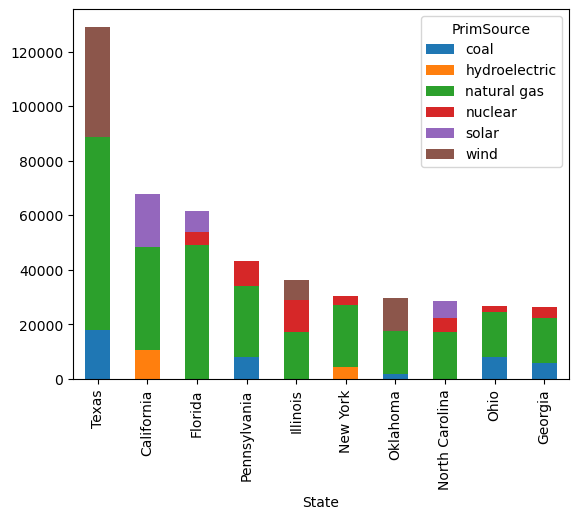

In [114]:
PlotVisTop10(df,'Total_MW')

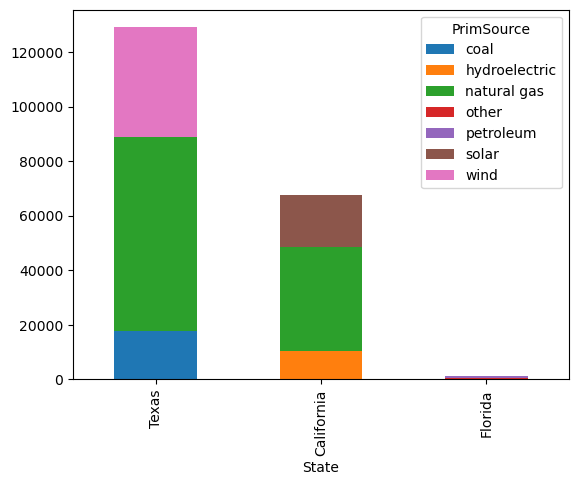

In [115]:
PlotVisTop10(df0,'Total_MW')

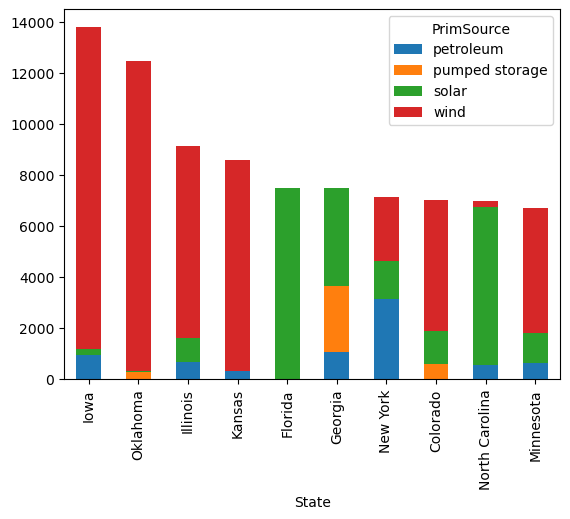

In [116]:
PlotVisTop10(df1,'Total_MW')

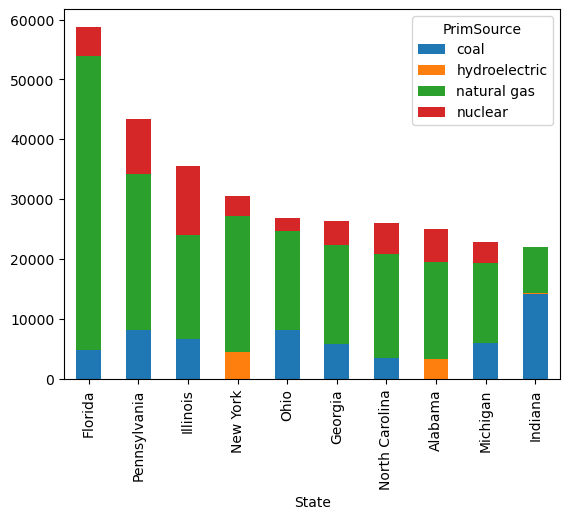

In [117]:
PlotVisTop10(df2,'Total_MW')

In [ ]:
df0

In [ ]:
def DifInstall_Total(df):
    df['DifInstall_Total'] = df['Install_MW'] - df['Total_MW']
    return df

def StatisticsVisualization(df):
    return DifInstall_Total(df).groupby('PrimSource')['DifInstall_Total'].sum().sort_values(ascending=False)#[:-1]
StatisticsVisualization(df)

In [ ]:
StatisticsVisualization(df)

In [ ]:


df_PrimSourceStatistics =StatisticsVisualization(df)[:-1]


custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Create a figure with a subplot for the pie chart
fig, ax = plt.subplots(figsize=(10, 6))

# Define a function to customize label display
def pie_label_func(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    if pct >= 4.2:  # Display label only if the percentage is greater than or equal to 3%
        return f'{pct:.1f}%\n({absolute:,})'
    else:
        return ''

# Plot the pie chart with adjusted autopct label placement
wedges, texts, autotexts = ax.pie(
    df_PrimSourceStatistics,
    labels=[f'{label}\n' if pct >= 3 else '' for label, pct in zip(df_PrimSourceStatistics.index, df_PrimSourceStatistics / df_PrimSourceStatistics.sum() * 100)],
    autopct=lambda pct: pie_label_func(pct, df_PrimSourceStatistics),
    startangle=90,
    colors=custom_colors,
    wedgeprops=dict(width=0.4),
    textprops=dict(color="black"),
    labeldistance=1.1,  # Adjust label distance from the center to avoid overlapping
)

# Customize the appearance of the wedges and text
for wedge, text, autotext in zip(wedges, texts, autotexts):
    wedge.set_edgecolor('white')  # White edges for better visibility
    text.set_fontsize(10)        # Adjust text font size
    autotext.set_fontsize(8)     # Adjust autopct text font size

# Add a title
plt.title(f'Distribution by source of energy\n({format(int(df_PrimSourceStatistics.sum()), ",")} Total megawats)', fontsize=14)

# Save the pie chart as an image
# plt.savefig('DomPieChart_DistOPTRByDIV.png', bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
df.columns

In [ ]:
df_numberOfPlants = df.groupby(['State','PrimSource'])['PrimSource'].count().to_frame(name='Count').reset_index()
df_numberOfPlants#.fillna(0,inplace=True)

PlotVisTop10(df_numberOfPlants,'Count')

In [ ]:
# def VisTop10(df,column):
#     df_VisTop10 = df[df['State'].isin(set(Top10States(df)['State']))]
#     df_VisTop10 = df_VisTop10.groupby(['PrimSource','State'])[colum].sum().unstack().T
#     df_VisTop10.fillna(0,inplace=True)
#     df_VisTop10['Total'] = df_VisTop10.sum(axis=1)
#     return df_VisTop10.sort_values(by='Total').iloc[:,:-1][::-1]
    
# def PlotVisTop10(df):
#     VisTop10(get_top3('Total_MW',ByState(df))).plot(kind='bar', stacked = True)
#     return plt.show()

get_top3('Count',ByState(df_numberOfPlants))

In [ ]:
PlotStatistics(df.groupby('State')['PrimSource'].count().sort_values())
# df_statistics(df)

In [ ]:
PlotStatistics(df.groupby('PrimSource')['PrimSource'].count().sort_values())

In [97]:
df_KMeans

,sector_nam,PrimSource,Install_MW,Total_MW,Install_MW_State,Total_MW_State,Longitude,Latitude,Sector_encoded,PimSource_encoded,SInstall_MW,STotal_MW,STotal_MW_State,SSector_encoded,SPimSource_encoded,SLongitude,SLatitude,Cluster,State
0,Electric Utility,hydroelectric,2.3,2.3,18146.5,16742.1,-89.685000,45.178600,2,4,0.000469,0.000584,0.111472,0.333333,0.363636,0.770696,0.510480,2,Wisconsin
1,Electric Utility,hydroelectric,1.3,1.3,18146.5,16742.1,-87.758600,45.113600,2,4,0.000235,0.000330,0.111472,0.333333,0.363636,0.788796,0.509261,2,Wisconsin
2,Electric Utility,natural gas,91.0,79.0,18146.5,16742.1,-88.008600,44.540000,2,5,0.021278,0.020066,0.111472,0.333333,0.454545,0.786447,0.498509,2,Wisconsin
3,Electric Utility,hydroelectric,3.8,3.8,18146.5,16742.1,-88.067800,45.233300,2,4,0.000821,0.000965,0.111472,0.333333,0.363636,0.785891,0.511505,2,Wisconsin
4,Electric Utility,hydroelectric,2.6,2.6,18146.5,16742.1,-89.730600,45.441100,2,4,0.000540,0.000660,0.111472,0.333333,0.363636,0.770268,0.515401,2,Wisconsin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,Commercial CHP,natural gas,6.0,6.0,6527.7,5981.0,-67.109007,18.485901,0,5,0.001337,0.001524,0.039603,0.000000,0.454545,0.982811,0.010100,2,Puerto Rico
12003,Commercial Non-CHP,petroleum,3.8,2.4,6527.7,5981.0,-66.285500,18.260400,1,8,0.000821,0.000610,0.039603,0.166667,0.727273,0.990549,0.005873,1,Puerto Rico
12004,Industrial Non-CHP,petroleum,27.6,27.6,6527.7,5981.0,-65.963100,18.373600,6,8,0.006404,0.007010,0.039603,1.000000,0.727273,0.993578,0.007995,1,Puerto Rico
12005,Industrial Non-CHP,petroleum,8.2,8.2,6527.7,5981.0,-66.722048,18.470243,6,8,0.001853,0.002083,0.039603,1.000000,0.727273,0.986447,0.009807,1,Puerto Rico


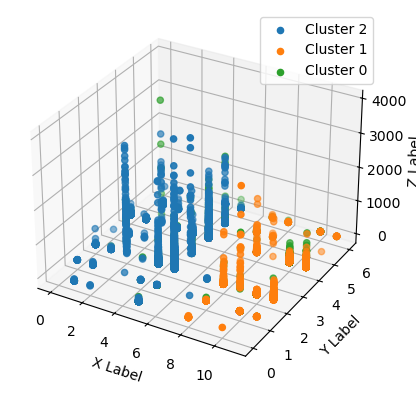

In [98]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure with 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points for each cluster separately
clusters = df_KMeans['Cluster'].unique()
for cluster in clusters:
    cluster_data = df_KMeans[df_KMeans['Cluster'] == cluster]
    ax.scatter(cluster_data['PimSource_encoded'], cluster_data['Sector_encoded'], cluster_data['Total_MW'], label=f'Cluster {cluster}')

# Set labels for the axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Add a legend
ax.legend()

plt.show()
